In [61]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer
# returns vector when there are two classes, likely means have to reduce dimension first then use....
#https://www.youtube.com/watch?v=63IN-qnI2YI
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import matplotlib
import warnings
#import xgboost as xgb
#import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
df = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')

In [3]:
df[df['flat_type'] == '4 ROOM']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
102,2000-01,ANG MO KIO,4 ROOM,222,ANG MO KIO AVE 1,07 TO 09,112.0,Model A,1993,315000.0
103,2000-01,ANG MO KIO,4 ROOM,102,ANG MO KIO AVE 3,10 TO 12,106.0,Model A,1993,296000.0
104,2000-01,ANG MO KIO,4 ROOM,304,ANG MO KIO AVE 1,04 TO 06,97.0,New Generation,1977,260000.0
105,2000-01,ANG MO KIO,4 ROOM,226,ANG MO KIO AVE 1,04 TO 06,91.0,New Generation,1978,247000.0
106,2000-01,ANG MO KIO,4 ROOM,336,ANG MO KIO AVE 1,07 TO 09,91.0,New Generation,1982,280000.0
...,...,...,...,...,...,...,...,...,...,...
369630,2012-02,YISHUN,4 ROOM,610,YISHUN ST 61,04 TO 06,84.0,Simplified,1986,368000.0
369631,2012-02,YISHUN,4 ROOM,612,YISHUN ST 61,04 TO 06,83.0,Simplified,1987,385000.0
369632,2012-02,YISHUN,4 ROOM,726,YISHUN ST 71,01 TO 03,84.0,Simplified,1985,345000.0
369633,2012-02,YISHUN,4 ROOM,715,YISHUN ST 71,01 TO 03,84.0,Simplified,1987,335000.0


In [4]:
#df.dropna()

In [5]:
type(df['month'].iloc[0])

str

In [6]:
df['month']=pd.to_datetime(df['month'])
df['month'].head()

0   2000-01-01
1   2000-01-01
2   2000-01-01
3   2000-01-01
4   2000-01-01
Name: month, dtype: datetime64[ns]

In [7]:
time = df['month'].iloc[0]
time.dayofweek

5

In [8]:
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda y: y.month)
df['Day of Week'] = df['month'].apply(lambda z: z.dayofweek)

In [9]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [34]:
df[df['flat_type']=='MULTI-GENERATION']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year,Month,Day of Week,sqrt_resale_price,sqrt_floor_area_sqm
404,2000-01-01,BISHAN,MULTI-GENERATION,148,BISHAN ST 11,07 TO 09,134.0,Multi Generation,1987,480000.0,2000,1,Sat,692.820323,11.575837
2385,2000-01-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,179.0,Multi Generation,1987,453000.0,2000,1,Sat,673.052747,13.379088
2766,2000-02-01,BISHAN,MULTI-GENERATION,148,BISHAN ST 11,01 TO 03,134.0,Multi Generation,1987,530000.0,2000,2,Tue,728.010989,11.575837
4265,2000-02-01,TAMPINES,MULTI-GENERATION,460,TAMPINES ST 42,10 TO 12,150.0,Multi Generation,1987,485000.0,2000,2,Tue,696.419414,12.247449
4698,2000-02-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,01 TO 03,171.0,Multi Generation,1987,435000.0,2000,2,Tue,659.545298,13.076697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356013,2011-06-01,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,685000.0,2011,6,Wed,827.647268,12.806248
356014,2011-06-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,01 TO 03,171.0,Multi Generation,1987,655000.0,2011,6,Wed,809.320703,13.076697
359740,2011-08-01,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,164.0,Multi Generation,1987,645000.0,2011,8,Mon,803.118920,12.806248
361530,2011-09-01,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,01 TO 03,164.0,Multi Generation,1987,666000.0,2011,9,Thu,816.088231,12.806248


Text(0.5, 1.0, 'resale volume for 1990-1999 by day')

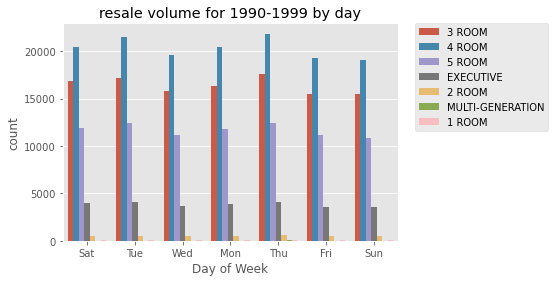

In [11]:
sns.countplot(x='Day of Week',data=df,hue='flat_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('resale volume for 1990-1999 by day')

Text(0.5, 1.0, 'resale volume for 1990-1999 by day')

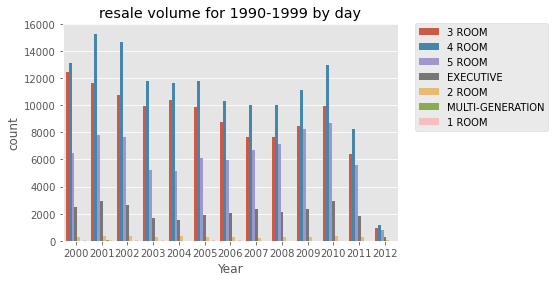

In [12]:
sns.countplot(x='year',data=df,hue='flat_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('resale volume for 1990-1999 by day')

No handles with labels found to put in legend.


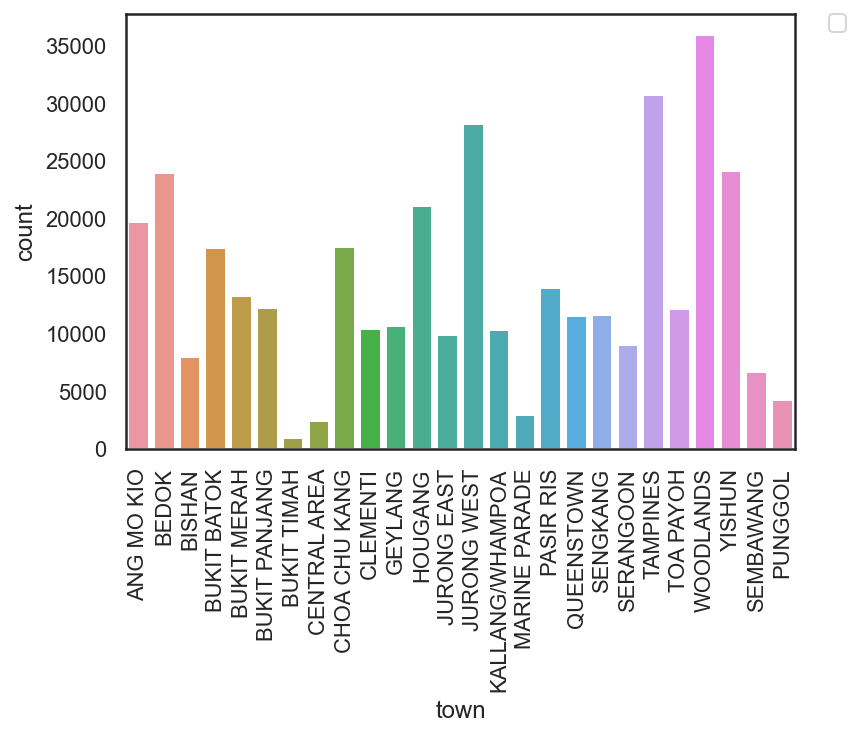

In [97]:
chart = sns.countplot(x='town',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for item in chart.get_xticklabels():
    item.set_rotation(90)

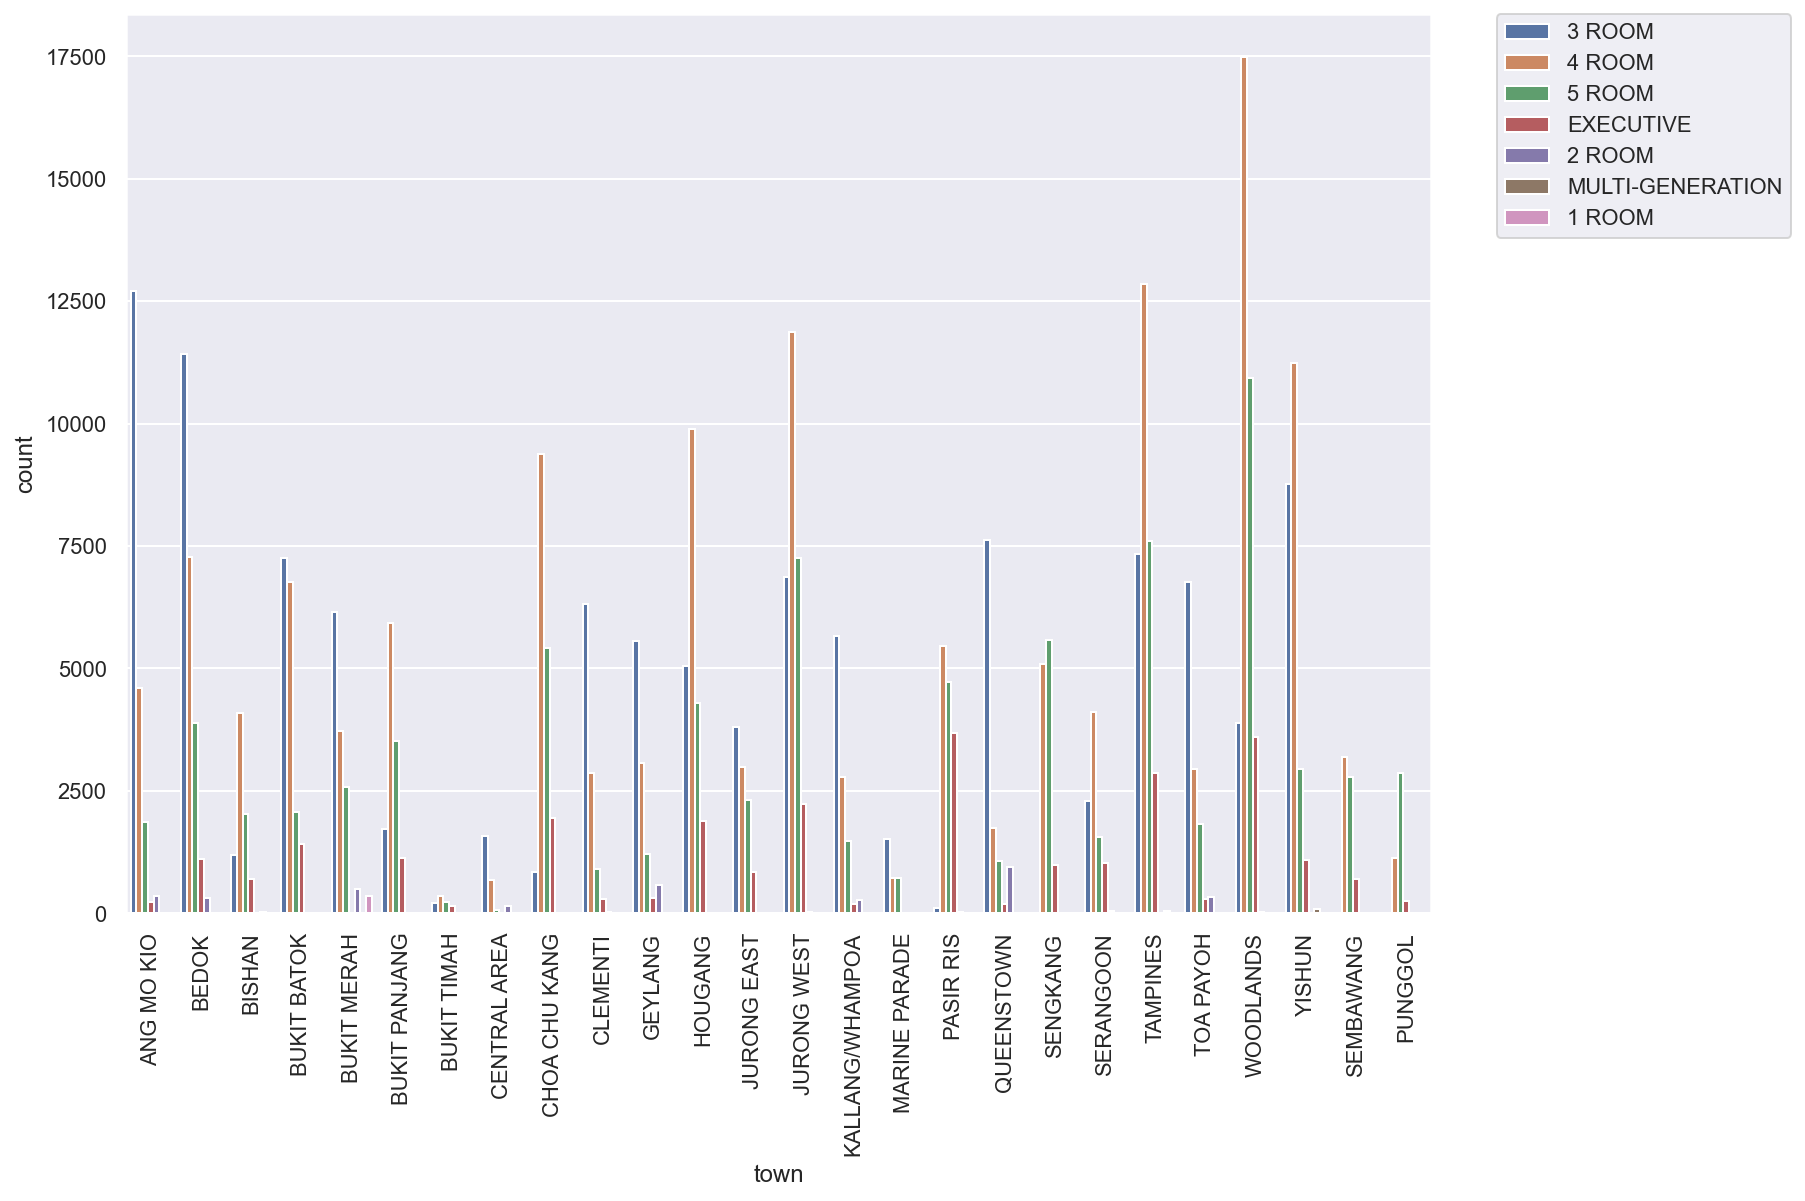

In [101]:
chart = sns.countplot(x='town',data=df,hue='flat_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(20,20)})
for item in chart.get_xticklabels():
    item.set_rotation(90)

In [13]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,Year,Month
count,369651.000000,369651.000000,369651.000000,369651.000000,369651.000000
mean,96.586204,1987.984659,281271.860617,2005.252765,6.510357
std,25.598886,9.122421,112118.967206,3.537177,3.431892
min,28.000000,1966.000000,28000.000000,2000.000000,1.000000
25%,73.000000,1981.000000,195000.000000,2002.000000,4.000000
50%,100.000000,1987.000000,263000.000000,2005.000000,7.000000
75%,115.000000,1997.000000,350000.000000,2008.000000,9.000000
max,297.000000,2012.000000,903000.000000,2012.000000,12.000000


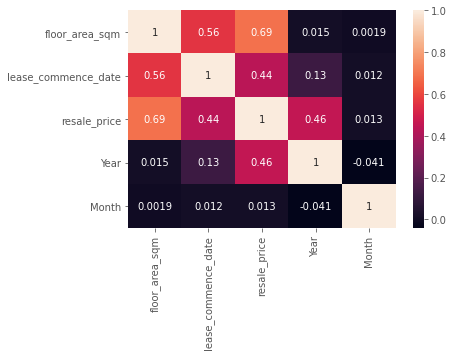

In [14]:
a = df.corr()
sns.heatmap(a,annot = True)

In [15]:
a

,floor_area_sqm,lease_commence_date,resale_price,Year,Month
floor_area_sqm,1.000000,0.556850,0.690142,0.015021,0.001927
lease_commence_date,0.556850,1.000000,0.437268,0.125157,0.011791
resale_price,0.690142,0.437268,1.000000,0.455641,0.013252
Year,0.015021,0.125157,0.455641,1.000000,-0.041090
Month,0.001927,0.011791,0.013252,-0.041090,1.000000


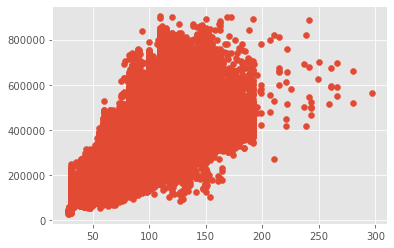

In [16]:
plt.scatter(df['floor_area_sqm'],df['resale_price'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

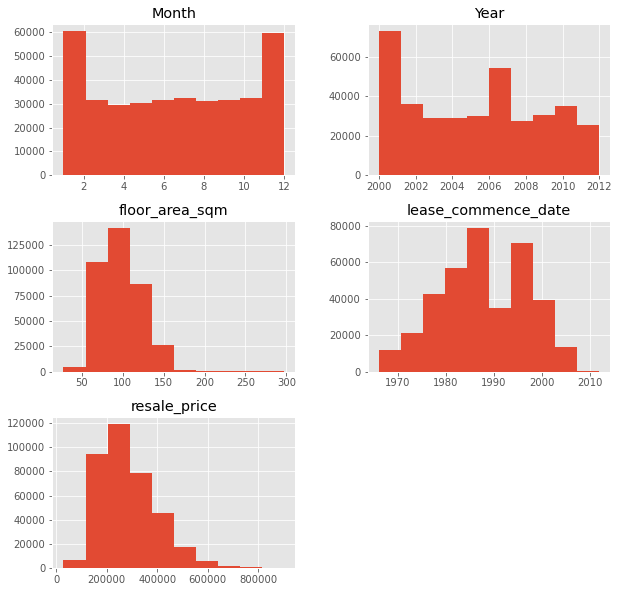

In [17]:
df.hist(figsize = (10, 10))
plt.tight_layout

1. If skewness is less than -1 or greater than 1, the distribution is skewed, but may or may not be considered high depending on the values.

2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetrical.


 mu = 281271.86 and sigma = 112118.82



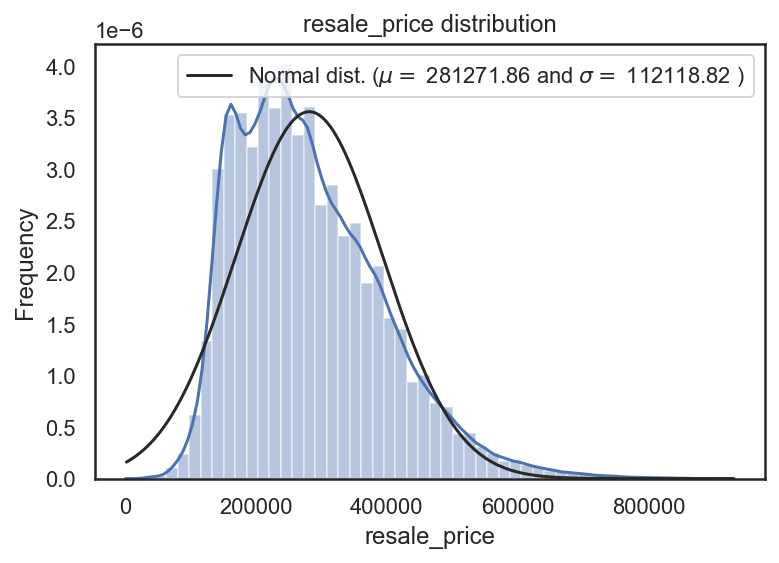

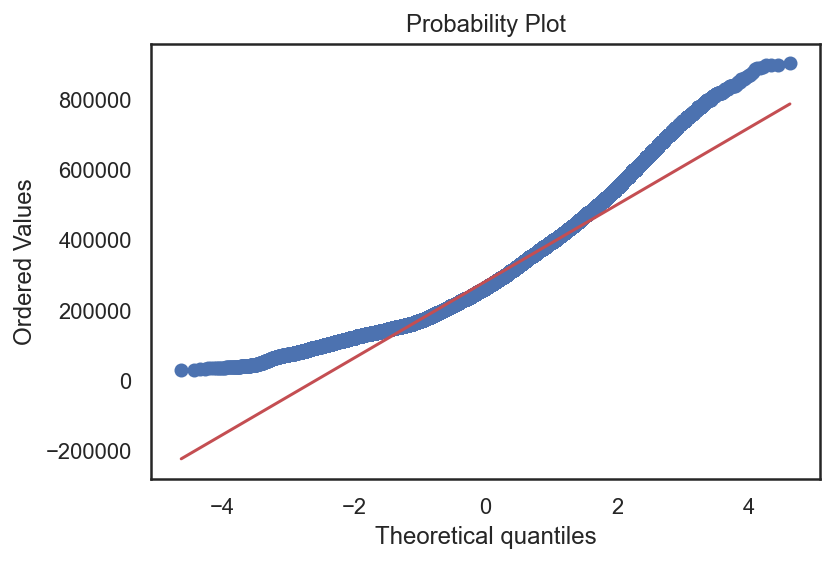

Skewness: 0.868381
Kurtosis: 0.843415


In [62]:
# Plot Histogram
sns.distplot(df['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('resale_price distribution')

fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())


 mu = 96.59 and sigma = 25.60



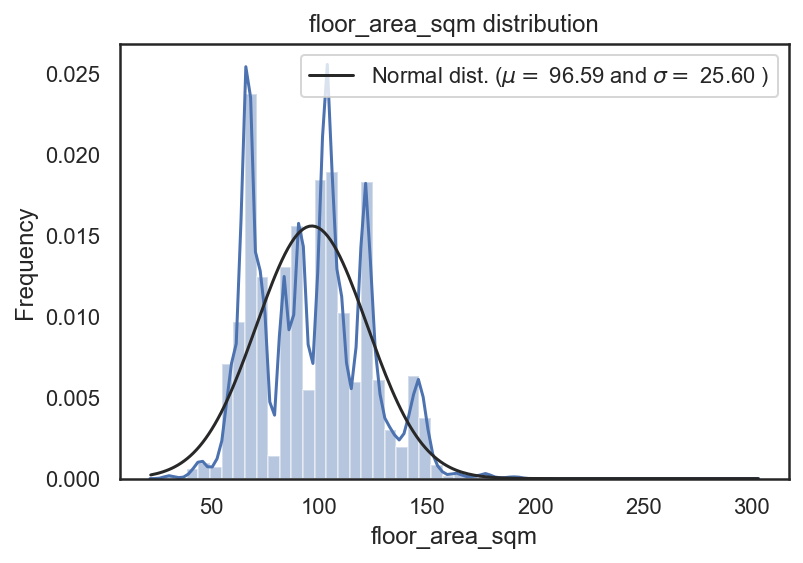

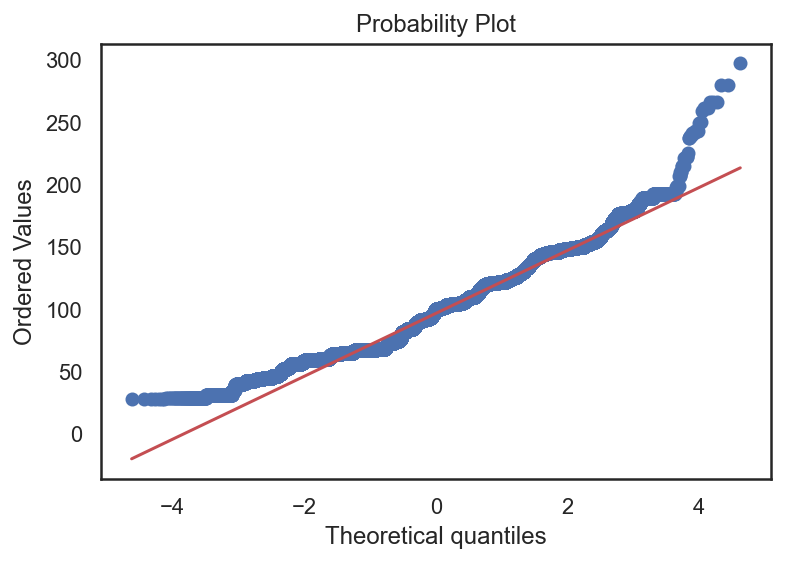

Skewness: 0.310634
Kurtosis: -0.364783


In [65]:
# Plot Histogram
sns.distplot(df['floor_area_sqm'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['floor_area_sqm'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('floor_area_sqm distribution')

fig = plt.figure()
res = stats.probplot(df['floor_area_sqm'], plot=plt)
plt.show()

print("Skewness: %f" % df['floor_area_sqm'].skew())
print("Kurtosis: %f" % df['floor_area_sqm'].kurt())

In [18]:
df.skew()
#probably need log resale_price

floor_area_sqm         0.310634
lease_commence_date   -0.108738
resale_price           0.868381
Year                   0.100926
Month                 -0.023476
dtype: float64

In [19]:
df['sqrt_resale_price'] = np.sqrt(df['resale_price'])
df['sqrt_floor_area_sqm'] = np.sqrt(df['floor_area_sqm'])
#Let's check skew values with transformation
print("\nskewness after transformation:\n")
print(df.skew())


skewness after transformation:

floor_area_sqm         0.310634
lease_commence_date   -0.108738
resale_price           0.868381
Year                   0.100926
Month                 -0.023476
sqrt_resale_price      0.361572
sqrt_floor_area_sqm    0.028395
dtype: float64



 mu = 520.21 and sigma = 103.22



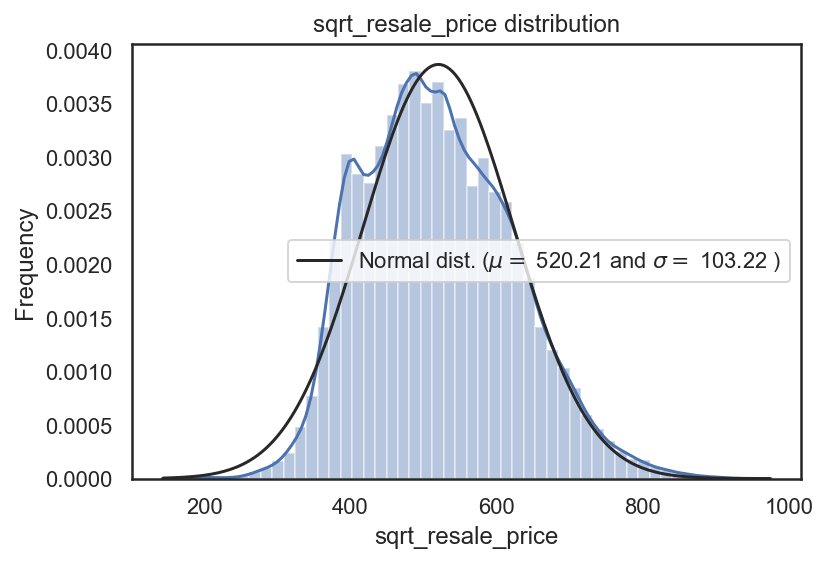

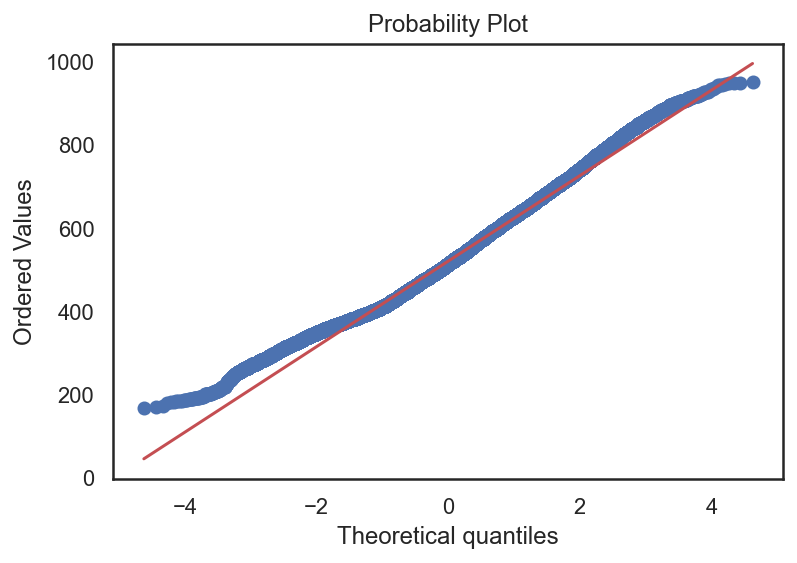

Skewness: 0.361572
Kurtosis: -0.153465


In [63]:
# Plot Histogram
sns.distplot(df['sqrt_resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['sqrt_resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('sqrt_resale_price distribution')

fig = plt.figure()
res = stats.probplot(df['sqrt_resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['sqrt_resale_price'].skew())
print("Kurtosis: %f" % df['sqrt_resale_price'].kurt())


 mu = 9.74 and sigma = 1.31



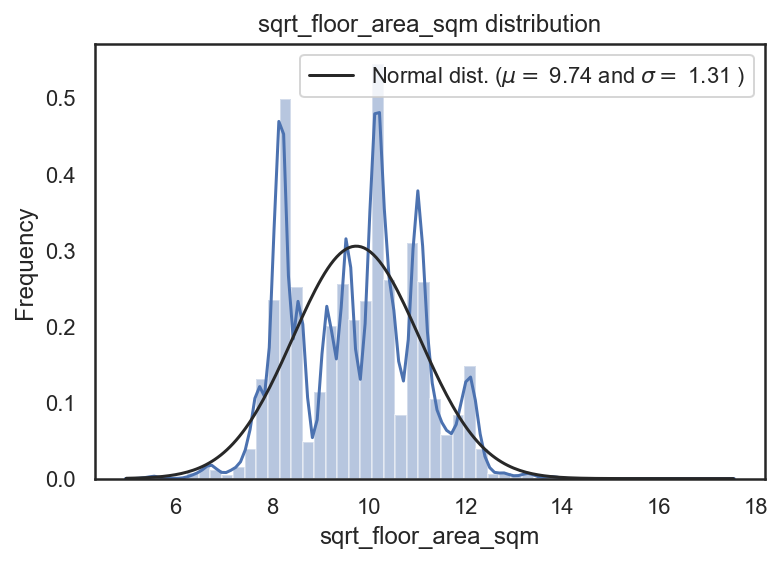

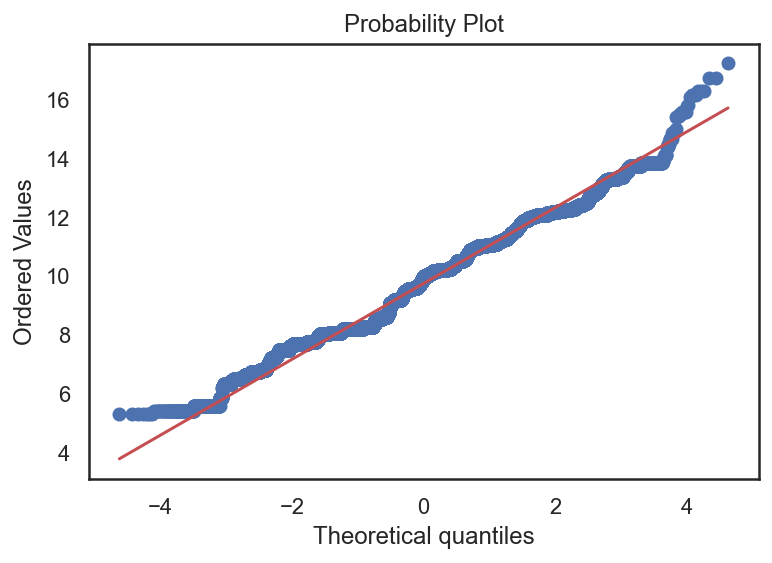

Skewness: 0.028395
Kurtosis: -0.612874


In [64]:
# Plot Histogram
sns.distplot(df['sqrt_floor_area_sqm'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['sqrt_floor_area_sqm'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('sqrt_floor_area_sqm distribution')

fig = plt.figure()
res = stats.probplot(df['sqrt_floor_area_sqm'], plot=plt)
plt.show()

print("Skewness: %f" % df['sqrt_floor_area_sqm'].skew())
print("Kurtosis: %f" % df['sqrt_floor_area_sqm'].kurt())

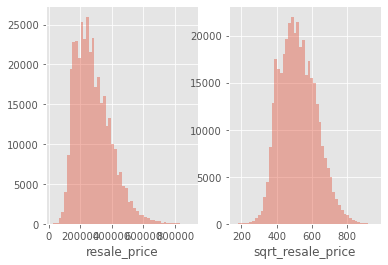

In [20]:
fig, ax = plt.subplots(1, 2) #to create 1 row 2 plot 
sns.distplot(df['resale_price'], kde = False, ax = ax[0])
sns.distplot(df['sqrt_resale_price'],  kde = False, ax = ax[1])

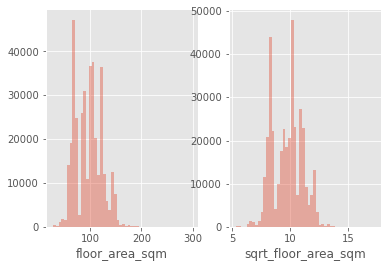

In [21]:
fig, ax = plt.subplots(1, 2) #to create 1 row 2 plot 
sns.distplot(df['floor_area_sqm'], kde = False, ax = ax[0])
sns.distplot(df['sqrt_floor_area_sqm'],  kde = False, ax = ax[1])

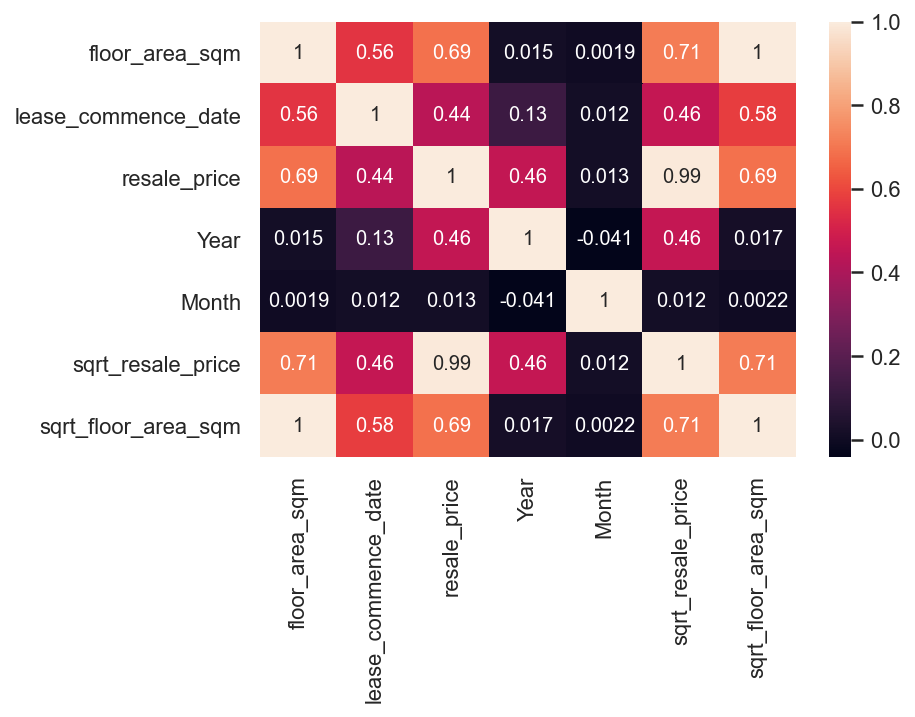

In [66]:
a = df.corr()
sns.heatmap(a,annot = True)
#correlation of sqrt form of floor_area_sqm and resale_price is better
# from 0.69 increased to 0.71

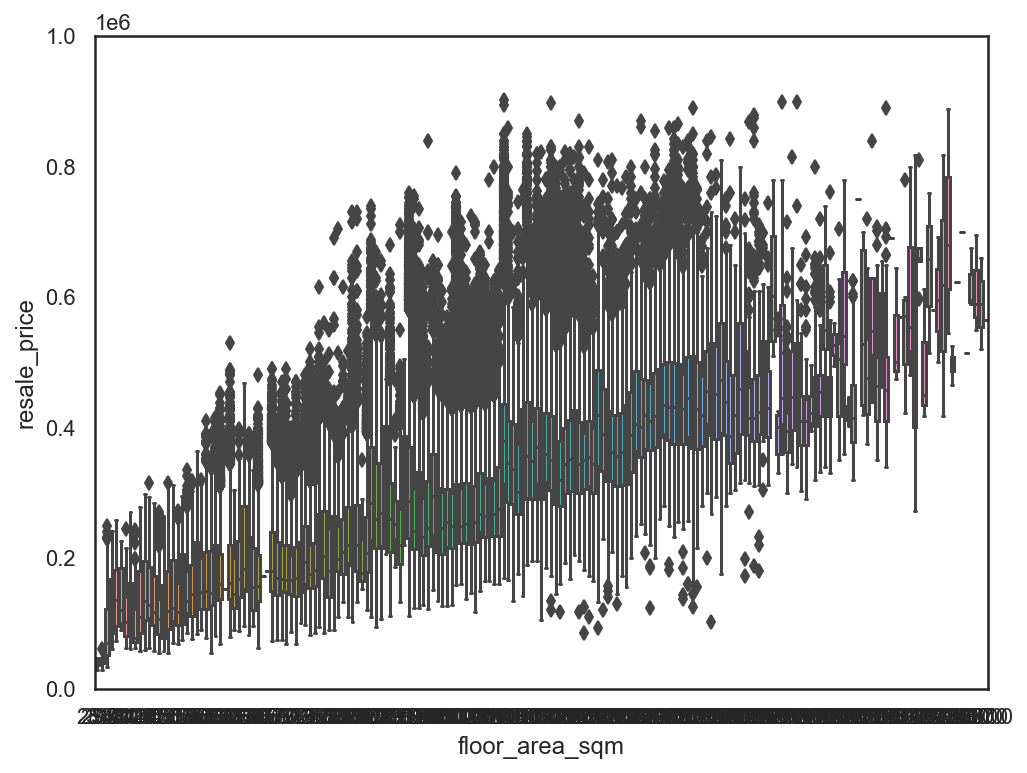

In [69]:
var = 'floor_area_sqm'
data = pd.concat([df['resale_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=0, ymax=1000000);
#look at that spread, there seems to be alot of extreme cases...

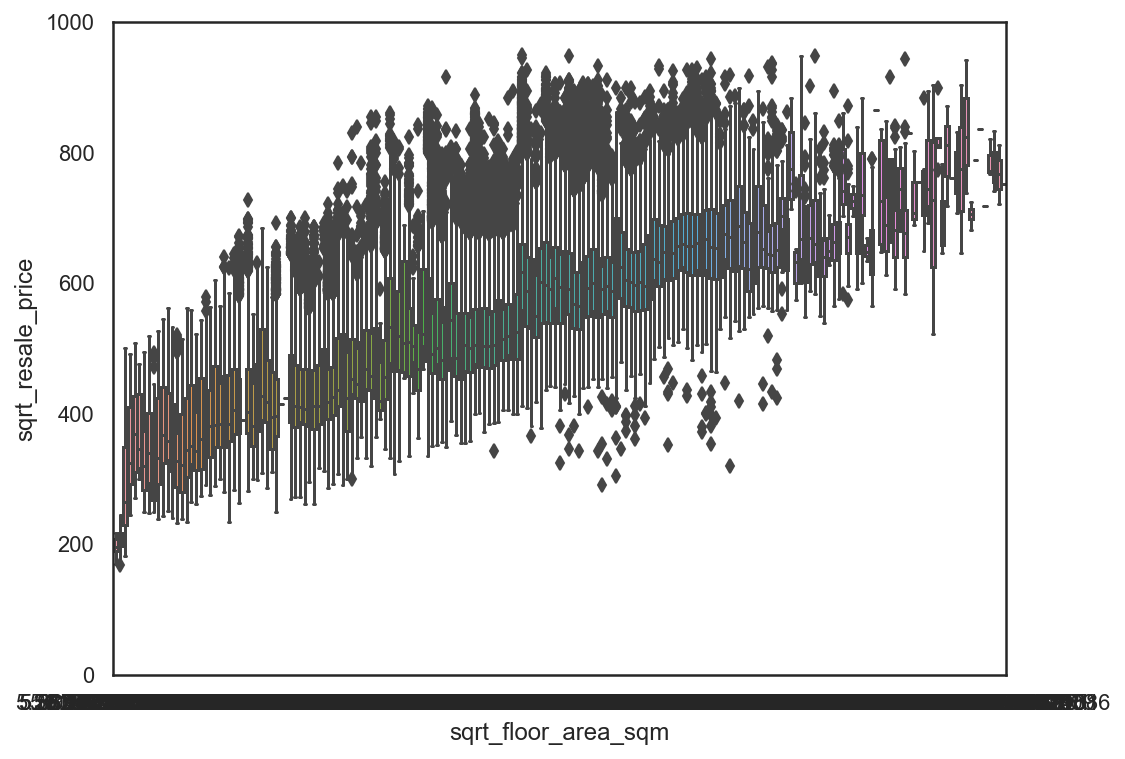

In [71]:
var = 'sqrt_floor_area_sqm'
data = pd.concat([df['sqrt_resale_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="sqrt_resale_price", data=data)
fig.axis(ymin=0, ymax=1000);
#look at that spread, there seems to be alot of extreme cases...

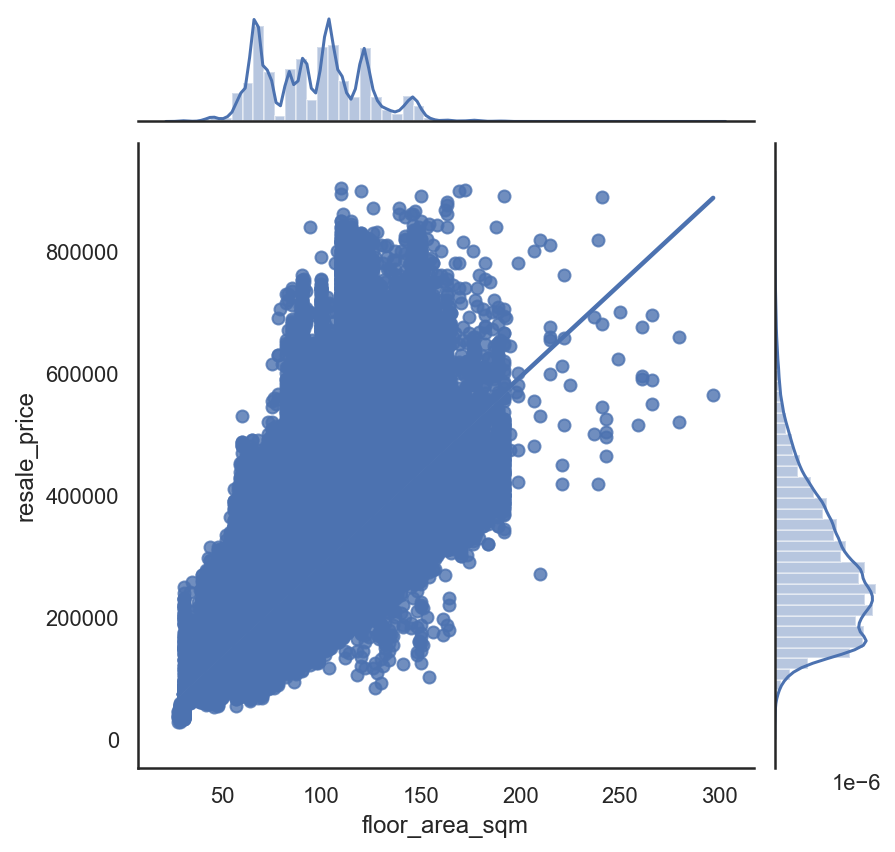

In [73]:
sns.jointplot(x=df['floor_area_sqm'], y=df['resale_price'], kind='reg')


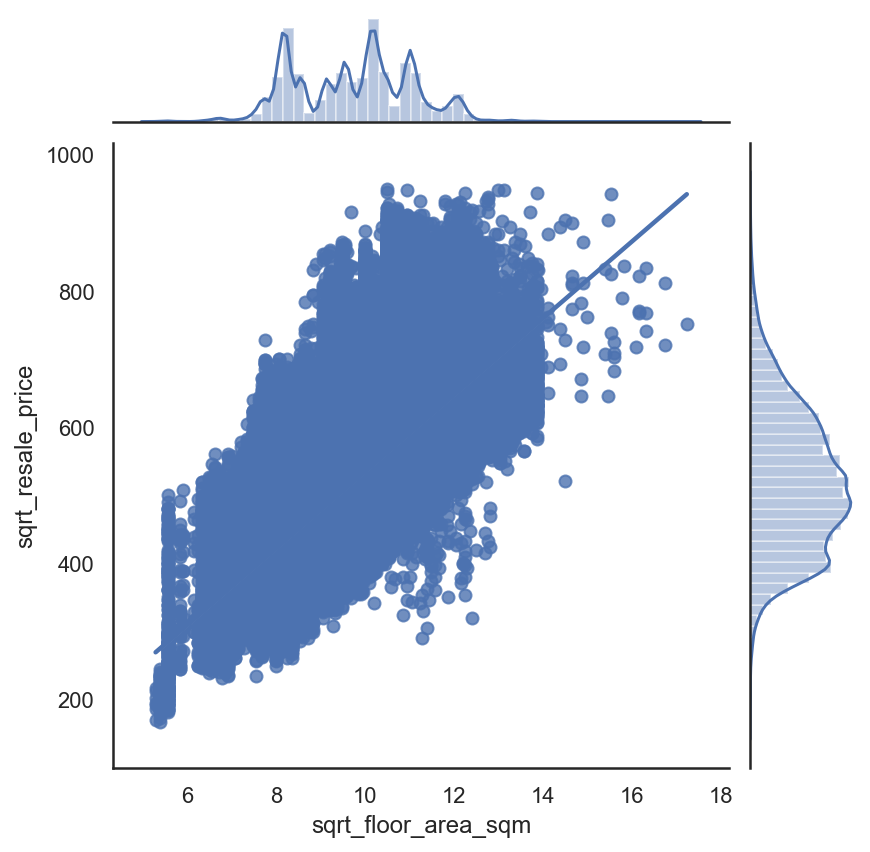

In [74]:
sns.jointplot(x=df['sqrt_floor_area_sqm'], y=df['sqrt_resale_price'], kind='reg')


In [22]:
#copied to df1 while dropping transformed columns
df1 = df.drop(['resale_price', 'floor_area_sqm'], axis = 1)

In [ ]:
#total Rooms vs Sales Price

In [23]:
df1.sample()

,month,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,Year,Month,Day of Week,sqrt_resale_price,sqrt_floor_area_sqm
64353,2001-10-01,GEYLANG,3 ROOM,10,PINE CL,13 TO 15,New Generation,1981,2001,10,Mon,403.732585,8.246211


In [24]:
#conduct multi-class classification to predict flat_type using
#sqrt_resale_price & sqrt_floor_area_sqm

In [27]:
df.groupby('flat_type').size()

flat_type
1 ROOM                 355
2 ROOM                3554
3 ROOM              114661
4 ROOM              142171
5 ROOM               81675
EXECUTIVE            27075
MULTI-GENERATION       160
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


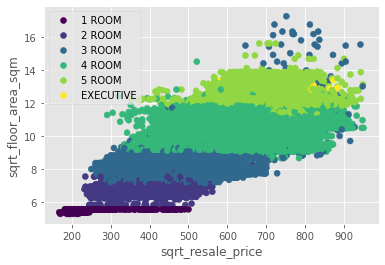

In [35]:
inv_name_dict = {'1 ROOM':1,'2 ROOM':2,
                 '3 ROOM':3,'4 ROOM':5,
                 '5 ROOM':5,'EXECUTIVE':6,
                 'MULTI-GENERATION':7}
colors = [inv_name_dict[item] for item in df['flat_type']]

scatter = plt.scatter(df['sqrt_resale_price'],df['sqrt_floor_area_sqm'], c = colors)\

plt.xlabel('sqrt_resale_price')
plt.ylabel('sqrt_floor_area_sqm')

plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

In [36]:
#Time to predict :D

In [37]:
x = df[['sqrt_resale_price','sqrt_floor_area_sqm']]
y = df['flat_type']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
random_state = 1, stratify = y)
#y_train.value_counts()

In [39]:
#y_test.value_counts()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# i choose 5 cause it'll take too long to iterate and find for my pc's sake
knn0 = KNeighborsClassifier(n_neighbors = 5)
knn0.fit(x_train, y_train)
new_data = np.array([454.422711, 9.165151])
new_data = new_data.reshape(1,-1)
#print(knn.predict(new_data))

In [41]:
index = [92279,95042,96680,28055,129913,130990,'not-sure']
type = ['3 ROOM','3 ROOM','3 ROOM','4 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
srp = [349.284984,360.555128,346.410162,316.227766,547.722558,679.705819,331.662]
sfas = [8.602325,8.185353,8.602325,9.165151,10.440307,11.000000,11.7473]

r = []
for i in range(len(type)):
    Fresh_data = np.array([srp[i],sfas[i]]) #sqrt price, sqrt area_sqm
    Fresh_data = Fresh_data.reshape(1, -1)
    r.append(knn0.predict(Fresh_data))
    
l = []
for i in range(len(r)):
    if r[i] == type[i]:
        l.append('True')
    else:
        l.append('False')
l

['True', 'True', 'True', 'False', 'True', 'True', 'False']

In [42]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(x_train, y_train)
#print(knn2.predict(new_data))

KNeighborsClassifier(n_neighbors=3)

In [43]:
index = [92279,95042,96680,28055,129913,130990,'not-sure']
type = ['3 ROOM','3 ROOM','3 ROOM','4 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
srp = [349.284984,360.555128,346.410162,316.227766,547.722558,679.705819,331.662]
sfas = [8.602325,8.185353,8.602325,9.165151,10.440307,11.000000,11.7473]

r = []
for i in range(len(type)):
    Fresh_data = np.array([srp[i],sfas[i]]) #sqrt price, sqrt area_sqm
    Fresh_data = Fresh_data.reshape(1, -1)
    r.append(knn2.predict(Fresh_data))
    
l = []
for i in range(len(r)):
    if r[i] == type[i]:
        l.append('True')
    else:
        l.append('False')
l

['True', 'True', 'True', 'False', 'True', 'True', 'False']

In [44]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

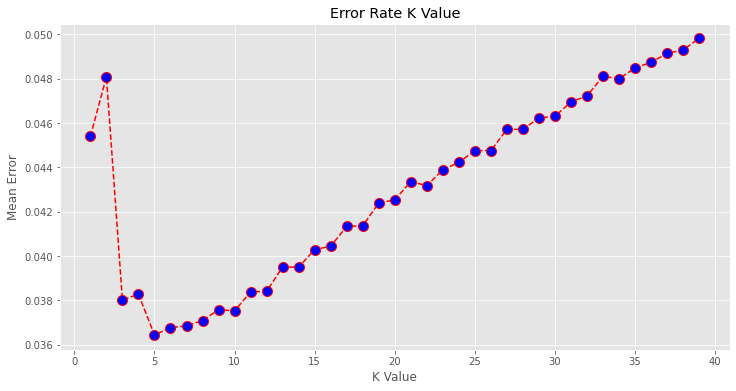

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [46]:
pred = knn.predict(x_train)
pred[:5]

array(['3 ROOM', '4 ROOM', '3 ROOM', '4 ROOM', '5 ROOM'], dtype=object)

In [47]:
#y_pred_prob = knn.predict_proba(x_test)
#y_pred_prob

In [48]:
y_pred = knn.predict(x_test)
a = sum(y_pred == y_test.values)
b = y_test.size
#accuracy
a/b

0.9501875631222045

In [49]:
y_pred = knn2.predict(x_test)
a = sum(y_pred == y_test.values)
b = y_test.size
#accuracy
a/b

0.9619823979223777

In [50]:
#confusion matrix since unequal no. of observation in each flat_type
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#y-axis(true) =1 ROOM, 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, M.G.
#x-axis(predict) = 1 ROOM, 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, M.G.

array([[   78,    28,     0,     0,     0,     0,     0],
       [    6,   940,   120,     0,     0,     0,     0],
       [    0,    33, 33550,   781,    18,    16,     0],
       [    0,     0,   663, 41242,   742,     5,     0],
       [    0,     0,     5,   496, 23383,   619,     0],
       [    0,     0,     1,    11,   617,  7486,     8],
       [    0,     0,     0,     1,     6,    40,     1]], dtype=int64)

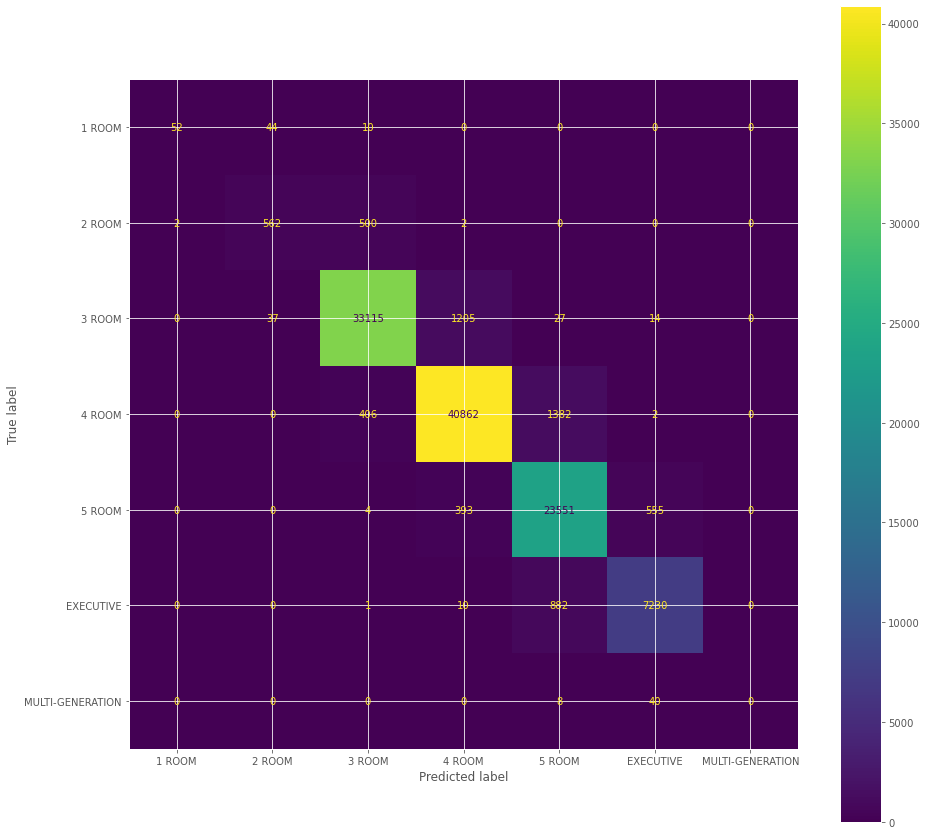

In [51]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 15))

plot_confusion_matrix(knn, x_test, y_test, ax=ax);

In [52]:
# 3 room tend to be confused with 4 room.
# 4 room tend to be confused with 3 room and 5 room.
# 5 room tend to be confused with 4 room and executive. 

In [53]:
#K-fold Cross Validation
#data is divided into k parts, cross_val_score is ran k times, each time
#one of the k subset data will be used as test set, the others are combined
#and used as training data. Accuracy is averaged over k trials
# cv = k
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores1 = cross_val_score(knn_cv, x, y, cv = 10)
cv_scores1.mean()

0.9570189119281572

In [54]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(knn_cv, x, y, cv = 10)
cv_scores.mean()

0.9575085662047677

In [55]:
#Using Knn,its pretty accurate in determining flat_type
#based on resale price and floor_area_sqm.

#but what other components of the dataset can we use?
#We cant use pca, as pca is for numerical data and we only have 2 columns
#we can do decision tree, but prof haven't go through the lab.


In [56]:
#finding the best k, considering I assumed it as 5
from sklearn.model_selection import GridSearchCV
knnGS = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(2,10)}
knn_gscv = GridSearchCV(knnGS, param_grid, cv=10)
knn_gscv.fit(x,y)
knn_gscv.best_params_

{'n_neighbors': 6}